# Enzyme Substrate Multi-Label Classification

**Context** <br>
Enzymes are known to act on molecules with structural similarities with their substrates. This behaviour is called promiscuity. Scientists working in drug discovery use this behaviour to target/design drugs to either block or promote biological actions. But, correct prediction of EC class(s) of substrates associated with enzymes has been a challenge in biology. Since there is no shortage of data, ML techniques can be employed to solve the aforementioned problem. Each row represents molecules that we need to classify their EC (Enzyme Commission) classes. The Enzyme Commission number (EC number) is a numerical classification scheme for enzymes, based on the chemical reactions they catalyze. It is stated that substrate molecules can belong to multiple EC classes at the same time, thus defining the multi-class classification problem. This problem is very crucial in fields like drug discovery and development, understanding enzyme function or metabolic analysis, and many more. 

**Goal** <br>
Predict the variables `EC1` and `EC2`

**Feature Description**:
- Id	Int	Id
- BertzCT	Float	Bertz complexity index
- Chi1	Float	1st order molecular connectivity index
- Chi1n	Float	Chi1 normalized
- Chi1v	Float	1st order molecular variance connectivity index
- Chi2n	Float	2nd order molecular connectivity index
- Chi2v	Float	2nd order molecular variance connectivity index
- Chi3v	Float	3rd order molecular variance connectivity index
- Chi4n	Float	4th order molecular connectivity index, normalized
- EState_VSA1	Float	Electrotopological state
- EState_VSA2	Float	Electrotopological state
- ExactMolWt	Float	Exact molecular weight
- FpDensityMorgan1	Float	Morgan fingerprint density for radius 1
- FpDensityMorgan2	Float	Morgan fingerprint density for radius 2
- FpDensityMorgan3	Float	Morgan fingerprint density for radius 3
- HallkierAlpha	Float	The Hall-Kier alpha value for a molecule
- HeavyAtomMolWt	Float	Molecular weight of heavy atoms only (excluding hydrogens)
- Kappa3	Float	Hall-Kier Kappa3 value
- MaxAbsEStateIndex	Float	Max Aboslute of E-state index
- MinEStateIndex	Float	Min of E-state index
- NumHeteroatoms	Int	Number of heteroatoms (atoms other than carbon and hydrogen)
- PEOE_VSA10	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- PEOE_VSA14	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- PEOE_VSA6	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- PEOE_VSA7	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- PEOE_VSA8	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- SMR_VSA10	Float	Solvent-accessible surface area Van der Waals surface area contribution for a specific atom type
- SMR_VSA5	Float	Solvent-accessible surface area Van der Waals surface area contribution for a specific atom type
- SlogP_VSA3	Float	LogP-based surface area contribution
- VSA_EState9	Float	E-state fragment contribution for Van der Waals surface area calculation
- fr_COO	Int	Number of carboxyl (COO) functional groups, ranging 0-8
- fr_COO2	Int	Number of carboxyl (COO) functional groups, ranging 0-8
- EC1	Int	Binary feature, to be predicted label (Oxidoreductases)
- EC2	Int	Binary feature, to be predicted label (Transferases)
- EC3	Int	Binary feature of the EC class (Hydrolases)
- EC4	Int	Binary feature of the EC class (Lyases)
- EC5	Int	Binary feature of the EC class (Isomerases)
- EC6	Int	Binary feature of the EC class (Ligases)


**Resources**:
- [Kaggle Challenge](https://www.kaggle.com/competitions/playground-series-s3e18)
- [Dataset](https://www.kaggle.com/datasets/gopalns/ec-mixed-class)
- [Data Description](https://www.kaggle.com/competitions/playground-series-s3e18/discussion/419646#2324730)

In [1]:
# Import Standard Libraries
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import seaborn as sns

import mlflow

from pathlib import Path
from colorama import Style, Fore

# Set Pandas Options
pd.set_option('display.max_columns', 500)

In [2]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

In [3]:
# Define Colors
black = Style.BRIGHT + Fore.BLACK
magenta = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blue = Style.BRIGHT + Fore.BLUE
reset_colors = Style.RESET_ALL

# Read Data

In [4]:
# Switch flag for Kaggle Cloud
kaggle = False

# Switch flag for including original dataset
include_original_data = True

In [5]:
# Read training data
if kaggle:
    
    # Read data from Kaggle FS
    train_data = pd.read_csv('', index_col=0)

else:
    
    # Define local data file paths
    train_data_file_path = Path(os.path.abspath('')).parents[1] / 'data' \
                                                                / 'S3E18_enzyme_substrate_multilabel_classification' \
                                                                / 'enzyme_substrate_multilabel_classification_train.csv'
    test_data_file_path = Path(os.path.abspath('')).parents[1] / 'data' \
                                                               / 'S3E18_enzyme_substrate_multilabel_classification' \
                                                               / 'enzyme_substrate_multilabel_classification_test.csv'
    # Read data with Pandas DataFrame
    train_data = pd.read_csv(train_data_file_path, index_col=0)
    test_data = pd.read_csv(test_data_file_path, index_col=0)

In [6]:
train_data.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,222.068080,1.181818,1.727273,2.363636,-0.24,212.163,8.170000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,260.029719,1.346154,2.076923,2.769231,-0.09,247.031,3.201491,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,382.131027,1.085714,1.742857,2.400000,-0.78,354.106,15.033890,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,530.070277,1.162791,1.573770,2.270270,-1.30,506.124,6.724301,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,118.062994,1.444444,2.111111,2.555556,-1.10,108.056,3.931272,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0,1,1,1,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             14838 no

# Exploratory Data Analysis (EDA)

## Shapes Information

In [8]:
# Print shapes information
print(f'{blue}Data Shapes:'
      f'{blue}\n- Train Data     -> {red}{train_data.shape}'
      f'{blue}\n- Test Data      -> {red}{test_data.shape}\n')

Data Shapes:
- Train Data     -> (14838, 37)
- Test Data      -> (9893, 31)



## Null Values Information

In [9]:
# Print null values information
print(f'{blue}Data Columns with Null Values:'
      f'{blue}\n- Train Data     -> {red}{train_data.isnull().any().sum()}'
      f'{blue}\n- Test Data      -> {red}{test_data.isnull().any().sum()}\n')

Data Columns with Null Values:
- Train Data     -> 0
- Test Data      -> 0



## Feature Distribution

### Numerical Feature Distribution

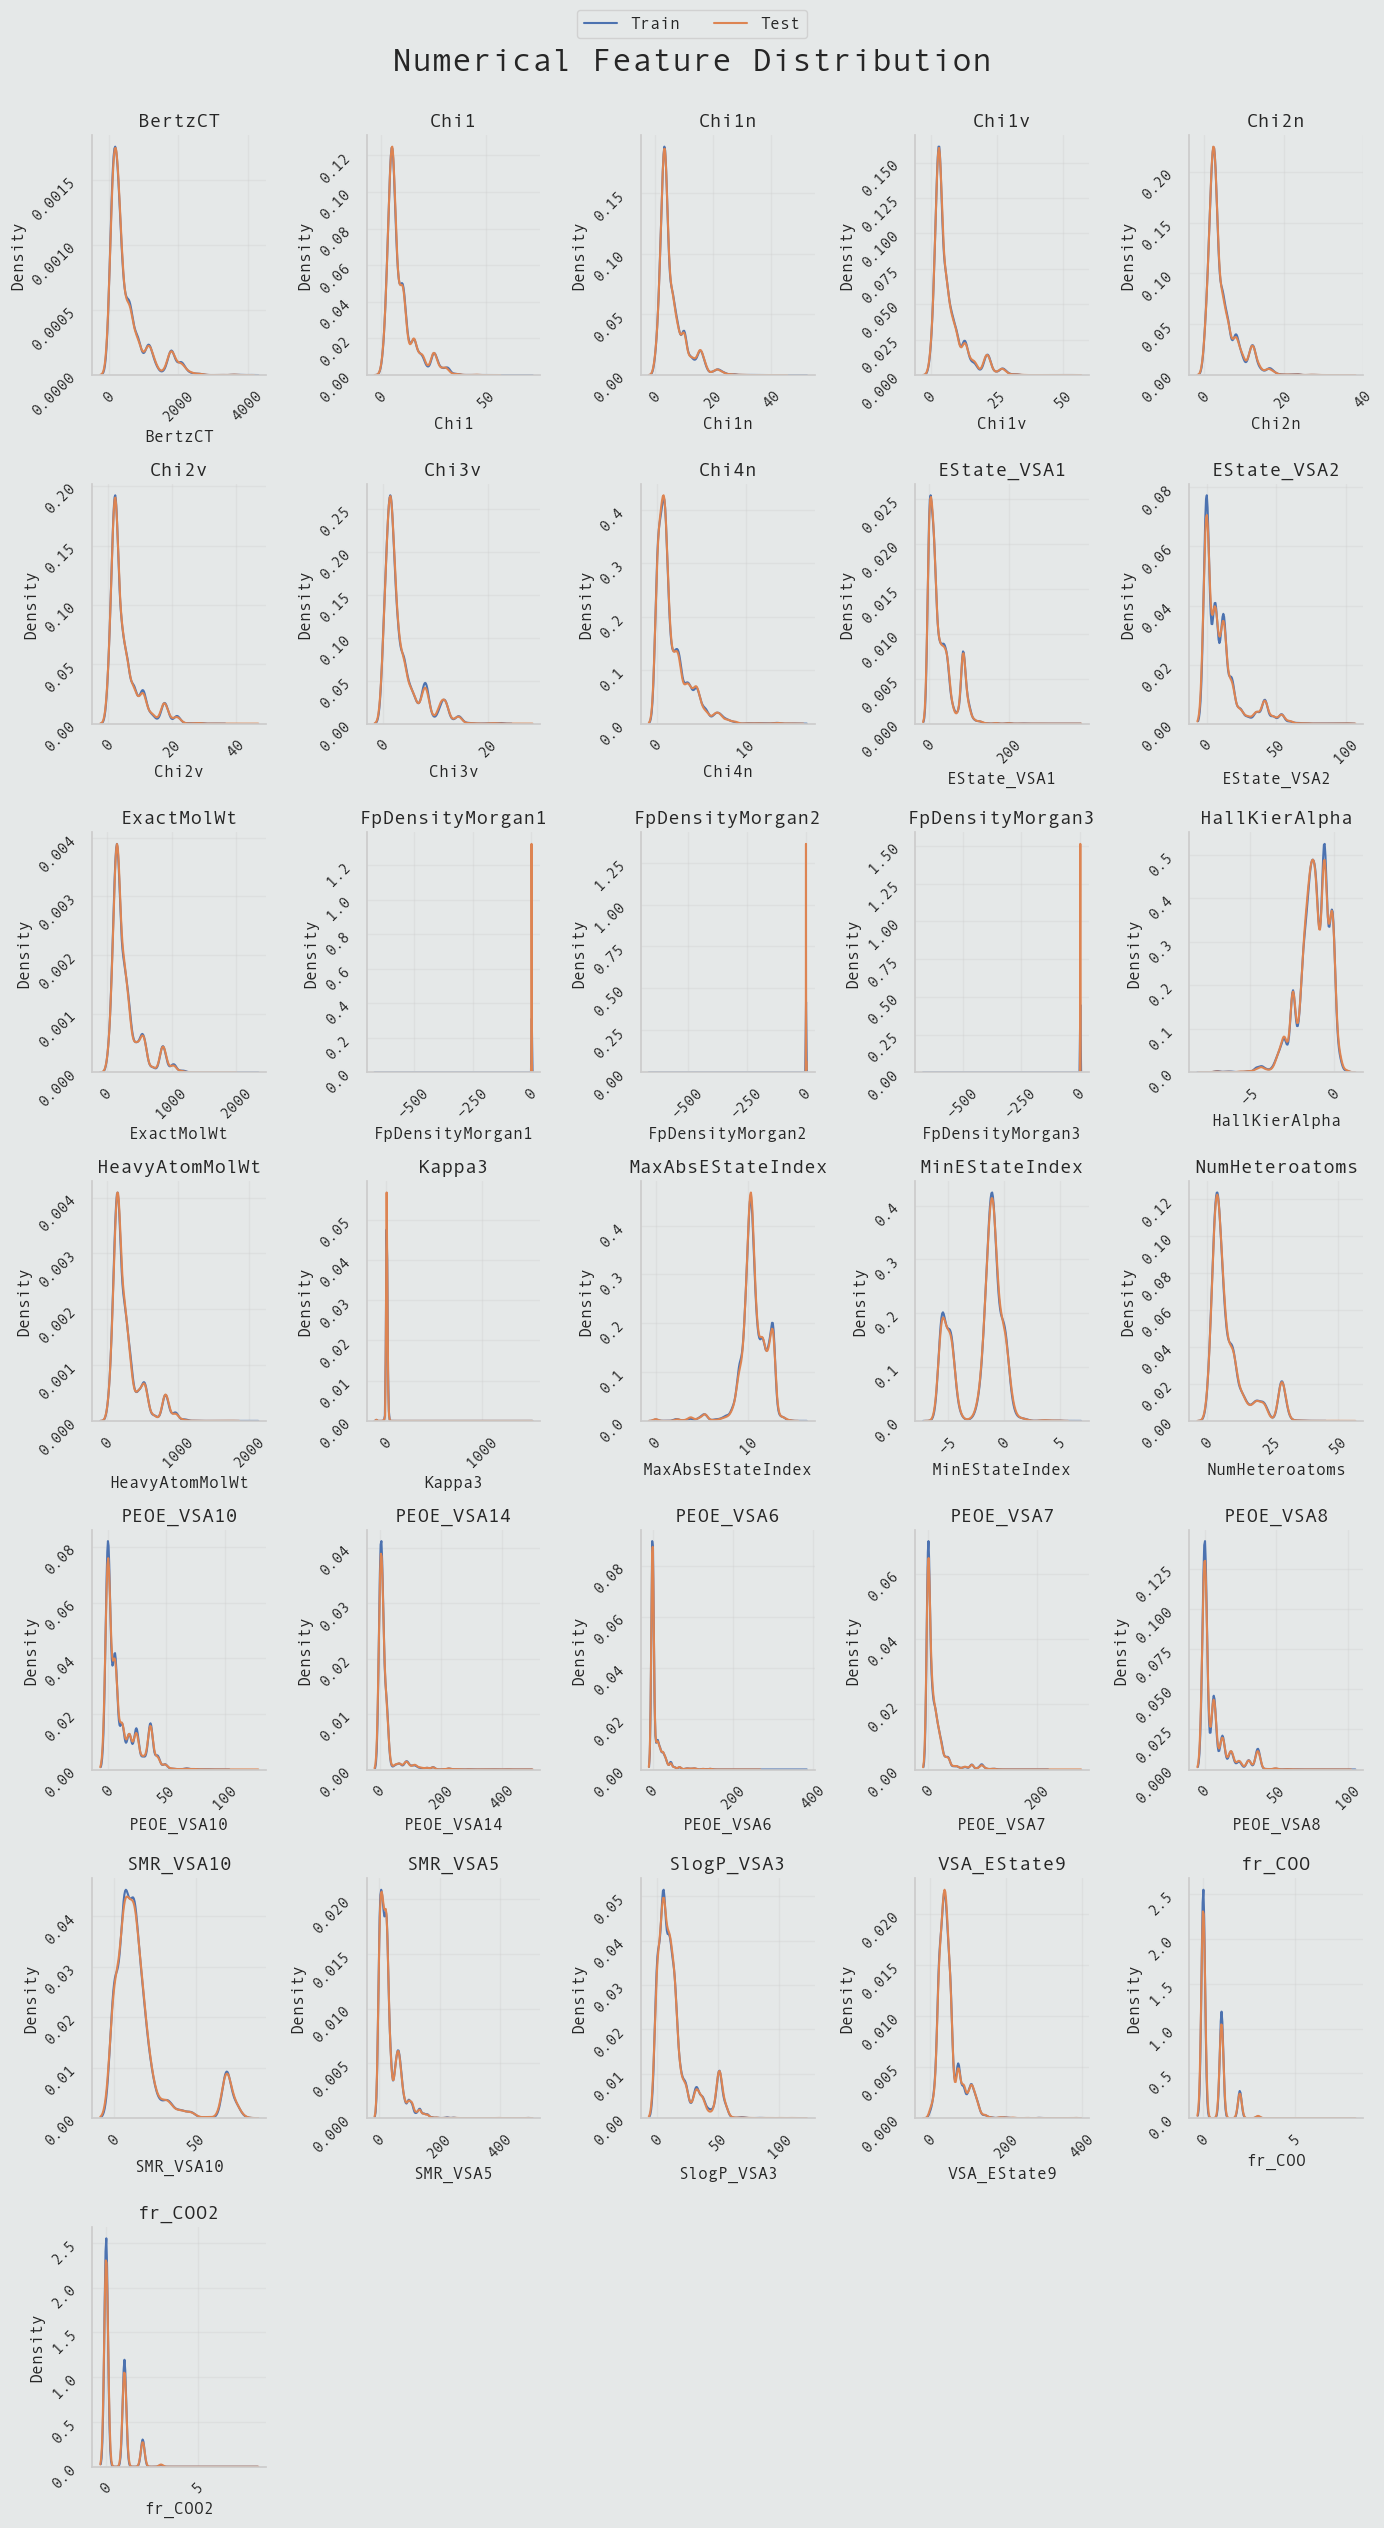

In [10]:
# Plot the KDE of each feature
figure, ax = plt.subplots(7, 5, figsize=(14, 25))
ax = ax.flatten()

# Fetch the data to plot
for index, column_name in enumerate(train_data.columns[:-6]):
    
    # Plot data
    sns.kdeplot(data=train_data[column_name],
                label='Train',
                ax=ax[index])
    
    sns.kdeplot(data=test_data[column_name],
                label='Test',
                ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()
    
# Remove the empty subplots
figure.delaxes(ax[-4])
figure.delaxes(ax[-3])
figure.delaxes(ax[-2])
figure.delaxes(ax[-1])
    
# Set the legend
figure.legend(handles, 
              labels, 
              loc='center', 
              bbox_to_anchor=(0.5, 1.01), 
              fontsize=12,
              ncol=2)

# Set figure Title
figure.suptitle('Numerical Feature Distribution',
                fontweight='bold',
                y=1.00,
                fontsize=24)

plt.tight_layout()

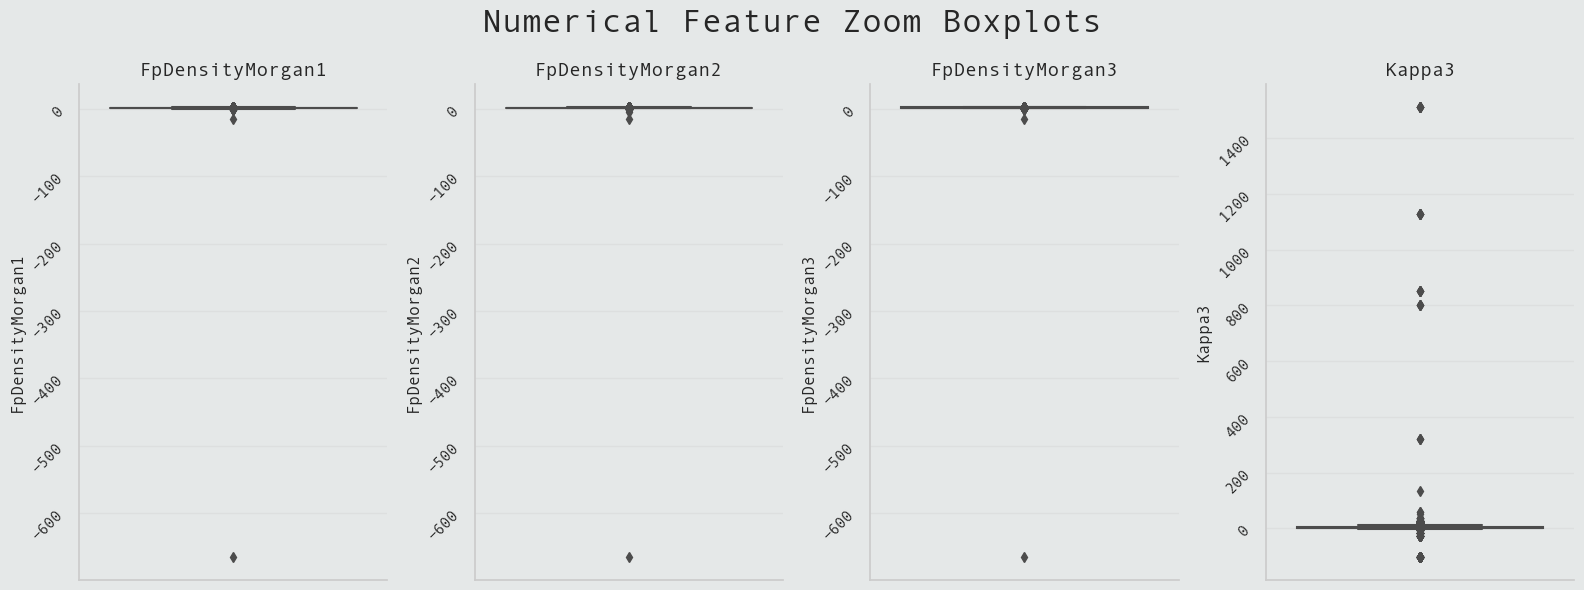

In [11]:
# Define the list of columns to have a closer look
raw_numerical_feature_zoom = ['FpDensityMorgan1', 
                              'FpDensityMorgan2', 
                              'FpDensityMorgan3', 
                              'Kappa3']

# Define figure and axes
figure, ax = plt.subplots(1, 4, figsize=(16, 6))
ax = ax.flatten()

# Fetch the data to plot
for index, column_name in enumerate(raw_numerical_feature_zoom):
    
    # Plot data
    sns.boxplot(data=train_data,
                y=column_name,
                ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)

# Set figure Title
figure.suptitle('Numerical Feature Zoom Boxplots',
                fontweight='bold',
                fontsize=24)

plt.tight_layout()

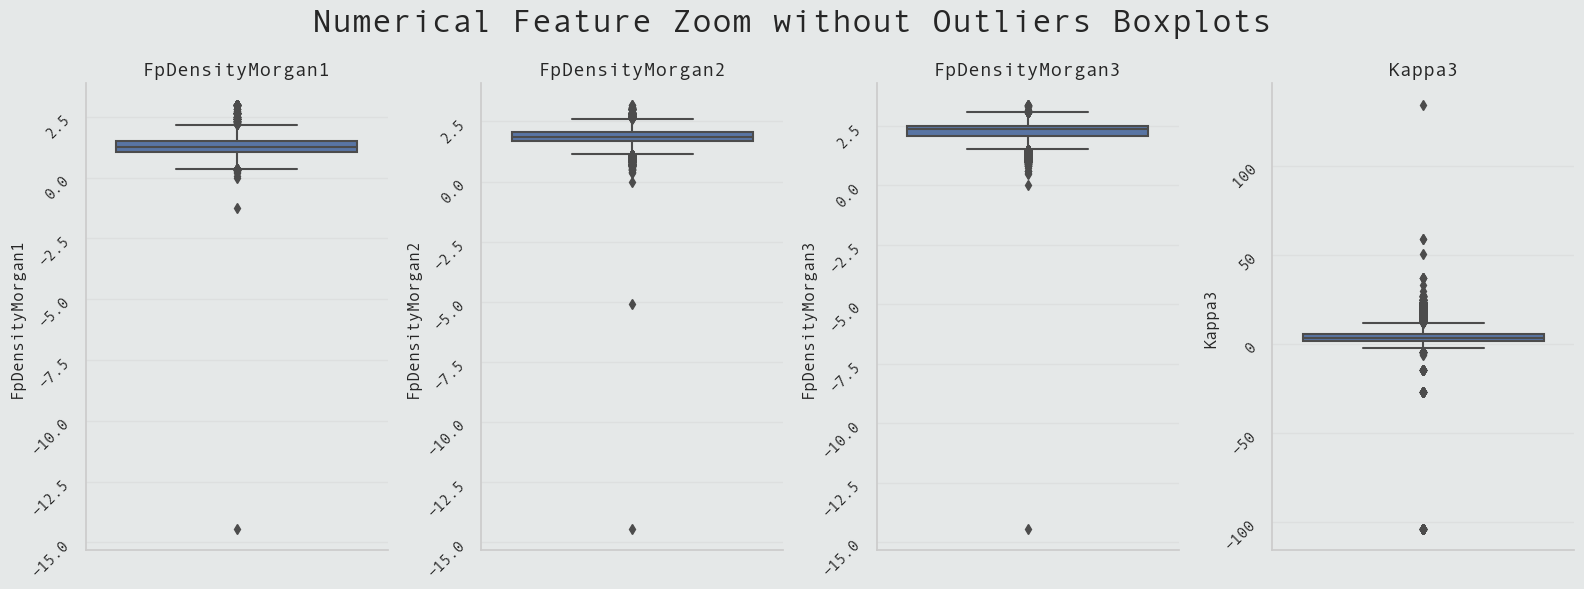

In [14]:
# Define the list of columns to have a closer look without outliers
raw_numerical_feature_zoom = ['FpDensityMorgan1', 
                              'FpDensityMorgan2', 
                              'FpDensityMorgan3', 
                              'Kappa3']

# Define filtering conditions
fp_density_morgan1_outlier_condition = train_data['FpDensityMorgan1'] >= -100
fp_density_morgan2_outlier_condition = train_data['FpDensityMorgan2'] >= -100
fp_density_morgan3_outlier_condition = train_data['FpDensityMorgan3'] >= -100
kappa_3_outlier_condition = train_data['Kappa3'] <= 200

# Define figure and axes
figure, ax = plt.subplots(1, 4, figsize=(16, 6))
ax = ax.flatten()

# Fetch the data to plot
for index, column_name in enumerate(raw_numerical_feature_zoom):
    
    # Plot data
    sns.boxplot(data=train_data.loc[fp_density_morgan1_outlier_condition & 
                                    fp_density_morgan2_outlier_condition & 
                                    fp_density_morgan3_outlier_condition & 
                                    kappa_3_outlier_condition],
                y=column_name,
                ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)

# Set figure Title
figure.suptitle('Numerical Feature Zoom without Outliers Boxplots',
                fontweight='bold',
                fontsize=24)

plt.tight_layout()

- Features have different scales. We need Data Standardization
- Most of the features are right-skewed. We need Data Normalization
- The features `FpDensityMorgan1`, `FpDensityMorgan2`, `FpDensityMorgan3` and `Kappa3` have huge outliers. Need to remove them.

## Label Distribution

In [15]:
# Compute the Label Distribution with the occurences of each label
label_distribution = pd.DataFrame(train_data.iloc[:,-6:].sum(axis=0), columns=['Count'])

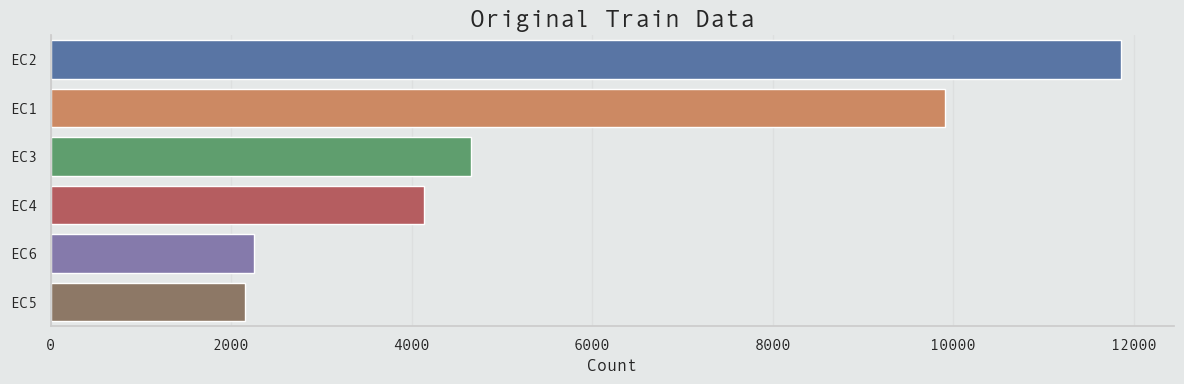

In [40]:
# Define figure and axes
figure, ax = plt.subplots(1, 1, figsize=(12, 4))

# Plot train data label countplot
sns.barplot(data=label_distribution, 
            x='Count',
            y=label_distribution.index, 
            order=label_distribution['Count'].sort_values(ascending=False).index)

# Set plot titles
ax.set_title('Original Train Data', 
             fontweight='bold',
             fontsize=18)
    
plt.tight_layout()

- Since we are only interested in `EC1` and `EC2`, there is not huge class imbalance.

## Conclusions

- Perform Data 